In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import matplotlib.colors as colors
#from partials import zintegral_fast, restrate_Ia, sigOM0sqinv
from matplotlib import ticker, cm
from astropy.cosmology import FlatLambdaCDM
import scipy.integrate as integrate
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import sys
#sys.path.insert(1, '/Users/akim/project/PeculiarVelocity/doc/src/')

import partials_fD2 

In [2]:
cov,z,fD = partials_fD2.set1(useGW=True)

[[[ 3.98099824e-04 -2.02683053e-08 -2.83696194e-07  4.52481451e-06]
  [-2.02683053e-08  1.05498822e-04  5.40943607e-08 -8.62778397e-07]
  [-2.83696194e-07  5.40943607e-08  9.16633494e-05 -1.20763401e-05]
  [ 4.52481451e-06 -8.62778397e-07 -1.20763401e-05  1.92611674e-04]]]
[0.05 0.15 0.25] [0.53101399 0.55467625 0.56988571]


In [4]:
err=[]
for  i in range(3): err.append(np.sqrt(cov[0][i,i]))

In [5]:
fD_var_SN = partials_fD2.set1(useGW=False)

[[[ 8.69701634e-05 -4.50044100e-08 -2.14324255e-06  3.68225007e-06]
  [-4.50044100e-08  5.62436376e-05  9.74714269e-08 -1.67463159e-07]
  [-2.14324255e-06  9.74714269e-08  6.32988333e-05 -7.97508885e-06]
  [ 3.68225007e-06 -1.67463159e-07 -7.97508885e-06  1.37017957e-05]]]
[0.05 0.15 0.25] [0.53101399 0.55467625 0.56988571]


In [7]:
covSN,z,fD = fD_var_SN
errSN=[]
for  i in range(3): errSN.append(np.sqrt(covSN[0][i,i]))

In [78]:
def plt_style():
    plt.rcParams.update({
                        'lines.linewidth':1.0,
                        'lines.linestyle':'-',
                        'lines.color':'black',
                        'font.family':'serif',
                        'font.weight':'normal',
                        'font.size':13.0,
                        'text.color':'black',
                        'text.usetex':True,
                        'axes.edgecolor':'black',
                        'axes.linewidth':1.0,
                        'axes.grid':False,
                        'axes.titlesize':'x-large',
                        'axes.labelsize':'x-large',
                        'axes.labelweight':'normal',
                        'axes.labelcolor':'black',
                        'axes.formatter.limits':[-4,4],
                        'xtick.major.size':7,
                        'xtick.minor.size':4,
                        'xtick.major.pad':8,
                        'xtick.minor.pad':8,
                        'xtick.labelsize':'medium',
                        'xtick.minor.width':1.0,
                        'xtick.major.width':1.0,
                        'ytick.major.size':7,
                        'ytick.minor.size':4,
                        'ytick.major.pad':8,
                        'ytick.minor.pad':8,
                        'ytick.labelsize':'medium',
                        'ytick.minor.width':1.0,
                        'ytick.major.width':1.0,
                        'legend.numpoints':1,
                        #'legend.fontsize':'x-large',
                        'legend.shadow':False,
                        'legend.frameon':False})


# These are the "Tableau 20" colors as RGB.
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Tableau Color Blind 10
tableau20blind = [(0, 107, 164), (255, 128, 14), (171, 171, 171), (89, 89, 89),
             (95, 158, 209), (200, 82, 0), (137, 137, 137), (163, 200, 236),
             (255, 188, 121), (207, 207, 207)]
  
# Rescale to values between 0 and 1 
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)
for i in range(len(tableau20blind)):  
    r, g, b = tableau20blind[i]  
    tableau20blind[i] = (r / 255., g / 255., b / 255.)




In [79]:
#external results

#Wang 
y_w = 0.403
yerr_w = 0.031
z_w = 0.03

#WIGGLEZ

y_wi = [ 0.42,0.45, 0.43, 0.38 ]
yerr_wi = [0.07,0.04,0.04,0.04]
z_wi = [0.22, 0.41, 0.6, 0.78]

#6dFGRS
z_6 = 0.0674607714939523,
y_6 = 0.42380952380952375
yerr_6 = y_6- 0.3678571428571428

#SDSS II MGS
z_sm = 0.1509255475645636, 
y_sm = 0.4398809523809523
yerr_sm = y_sm - 0.3202380952380952
#0.15147311212814646, 0.5994047619047619

#SDSS II LRG

z_sl = [0.2505046583850932, 0.3713]
y_sl = [0.35059523809523807,0.45892857142857135]
yerr_sl = [0,0]
yerr_sl[0] = y_sl[0]-0.29404761904761895
yerr_sl[1] = y_sl[1]-0.4226190476190476

#Vipers
z_v = 0.8008009153318081
y_v = 0.47023809523809523
yerr_v = y_v - 0.38928571428571423



In [108]:
#Theoretical prediction
#from astropy.cosmology import FlatLambdaCDM

gamma=0.55
om0=0.3

zs=np.linspace(0,0.85)

fD_th = []
for iz in zs: 
    a = 1./(1+iz)
    f = partials_fD2.OmegaM(a,OmegaM0=om0)**gamma
    D_ = partials_fD2.D(a,OmegaM0=om0,gamma=gamma)
    fD_th.append(f*D_)
    
gamma=0.42
fD_th_42 = []
for iz in zs: 
    a = 1./(1+iz)
    f = partials_fD2.OmegaM(a,OmegaM0=om0)**gamma
    D_ = partials_fD2.D(a,OmegaM0=om0,gamma=gamma)
    fD_th_42.append(f*D_)
    
gamma=0.68
fD_th_68 = []
for iz in zs: 
    a = 1./(1+iz)
    f = partials_fD2.OmegaM(a,OmegaM0=om0)**gamma
    D_ = partials_fD2.D(a,OmegaM0=om0,gamma=gamma)
    fD_th_68.append(f*D_)

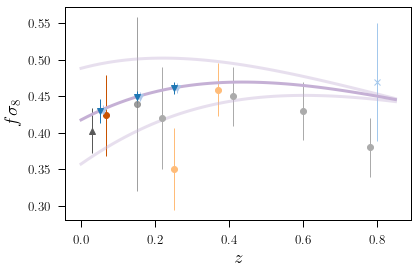

In [111]:
plt_style()

sigma8=0.81 #Change to Planck

#fig = plt.figure()
#ax = fig.add_subplot(111)
#ax.set_aspect(3)
plt.plot(zs,np.array(fD_th)*sigma8, c=tableau20[9], alpha=1,lw=3)
plt.plot(zs,np.array(fD_th_42)*sigma8, c=tableau20[9], alpha=0.4,lw=3)
plt.plot(zs,np.array(fD_th_68)*sigma8, c=tableau20[9], alpha=0.4,lw=3)

plt.errorbar(z_wi,y_wi, yerr=yerr_wi, fmt='o', label='WiggleZ',c=tableau20blind[2])
plt.errorbar(z_w,y_w, yerr=yerr_w, fmt='^', label='GW+PSCz (W17)',c=tableau20blind[3])

plt.errorbar(z_6,y_6, yerr=yerr_6, fmt='o', label='6dFGRS',c=tableau20blind[5])
plt.errorbar(z_sm,y_sm, yerr=yerr_sm, fmt='o', label='SDSS-II MGS',c=tableau20blind[6],alpha=0.8)
plt.errorbar(z_sl,y_sl, yerr=yerr_sl, fmt='o', label='SDSS-LRG',c=tableau20blind[8])
plt.errorbar(z_v,y_v, yerr=yerr_v, fmt='x', label='Vipers',c=tableau20blind[7])


plt.errorbar(z+0.01,np.array(fD)*sigma8, yerr=np.array(errSN)*sigma8, fmt='v', label='SN',c=tableau20[1])#,markersize=8)
plt.errorbar(z,np.array(fD)*sigma8, yerr=np.array(err)*sigma8, fmt='v', label='GW BNS',c=tableau20[0])#,markersize=8)



#plt.ylim(0.2,0.5)
plt.ylabel(r'$f\sigma_8$')
plt.xlabel('$z$')
#plt.legend(fontsize=10) #loc="upper right")#bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout()
plt.savefig('fs8.png',dpi=250)